In [10]:
import pandas as pd
df=pd.read_csv("beer-servings.csv")
df.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [11]:
import numpy as np


In [12]:
df.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [13]:
df.drop(columns=['Unnamed: 0','country'],inplace=True)

In [14]:
df.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   beer_servings                 185 non-null    float64
 1   spirit_servings               185 non-null    float64
 2   wine_servings                 187 non-null    float64
 3   total_litres_of_pure_alcohol  192 non-null    float64
 4   continent                     193 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.7+ KB


In [16]:
df.duplicated().sum()

np.int64(9)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   beer_servings                 176 non-null    float64
 1   spirit_servings               176 non-null    float64
 2   wine_servings                 178 non-null    float64
 3   total_litres_of_pure_alcohol  183 non-null    float64
 4   continent                     184 non-null    object 
dtypes: float64(4), object(1)
memory usage: 8.6+ KB


In [19]:
df.isnull().sum()

,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [20]:
for col in df:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
df.isnull().sum()

/tmp/ipython-input-1422004066.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
continent,0


In [21]:
df.shape

(184, 5)

In [22]:
df.head(10)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa
5,102.0,128.0,45.0,4.9,North America
6,77.5,25.0,221.0,8.3,South America
7,21.0,179.0,11.0,3.8,Europe
8,261.0,72.0,212.0,10.4,Oceania
9,279.0,75.0,191.0,9.7,Europe


### Label Encoding for 'continent' column

I will convert the categorical `continent` column into numerical labels using `LabelEncoder`.

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'continent' column
df['continent'] = le.fit_transform(df['continent'])

print("Mapping of continents to numerical labels:")
for i, name in enumerate(le.classes_):
    print(f"{name}: {i}")

display(df.head())

Mapping of continents to numerical labels:
Africa: 0
Asia: 1
Europe: 2
North America: 3
Oceania: 4
South America: 5


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,1
1,89.0,132.0,54.0,4.9,2
2,25.0,0.0,14.0,0.7,0
3,245.0,138.0,312.0,12.4,2
4,217.0,57.0,45.0,5.9,0


In [24]:
df.shape

(184, 5)

### Outlier Handling using IQR Method

I will detect and remove outliers using the Interquartile Range (IQR) method. This method identifies values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR as outliers.

In [25]:
import pandas as pd

def clip_outliers_iqr(df, factor=1.5):
    df = df.copy()
    numeric_cols = df.select_dtypes(include="number").columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR

        df[col] = df[col].clip(lower, upper)

    return df




In [26]:
df.shape

(184, 5)

SPLITING FOR TRAINING AND TESTING


### Splitting Data for Training and Testing

I will split the preprocessed data into training and testing sets. The training set will comprise 80% of the data, and the testing set will contain the remaining 20%.

In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('total_litres_of_pure_alcohol', axis=1)
y = df['total_litres_of_pure_alcohol']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

display(X_train.head())

Shape of X_train: (147, 4)
Shape of X_test: (37, 4)
Shape of y_train: (147,)
Shape of y_test: (37,)


,beer_servings,spirit_servings,wine_servings,continent
66,31.0,3.0,10.0,0
68,199.0,438.0,28.0,3
31,147.0,1.0,4.0,0
12,42.0,63.0,7.0,1
41,149.0,87.0,11.0,3


MINMAX SCALING


### Min-Max Scaling for Features

I will apply Min-Max scaling to the features (`X_train` and `X_test`). This will scale the features to a specified range (typically 0 to 1), which can be beneficial for many machine learning algorithms. It's crucial to `fit` the scaler only on the training data (`X_train`) and then `transform` both training and testing data using the fitted scaler to avoid data leakage from the test set.

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("X_train_scaled head:")
display(X_train_scaled.head())

print("X_test_scaled head:")
display(X_test_scaled.head())

X_train_scaled head:


,beer_servings,spirit_servings,wine_servings,continent
66,0.089337,0.006849,0.029499,0.0
68,0.573487,1.000000,0.082596,0.6
31,0.423631,0.002283,0.011799,0.0
12,0.121037,0.143836,0.020649,0.2
41,0.429395,0.198630,0.032448,0.6


X_test_scaled head:


,beer_servings,spirit_servings,wine_servings,continent
19,0.066282,0.000000,0.000000,0.2
42,0.662824,0.198630,0.749263,0.4
165,0.438040,0.136986,0.548673,0.4
117,1.083573,0.006849,0.002950,0.0
156,0.778098,0.116438,0.814159,0.4


In [30]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the scaled training data
linear_model.fit(X_train_scaled, y_train)

print("Linear Regression model fitted successfully.")


Linear Regression model fitted successfully.


In [31]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_model = Lasso(random_state=42) # Added random_state for reproducibility

# Fit the model to the scaled training data
lasso_model.fit(X_train_scaled, y_train)

print("Lasso Regression model fitted successfully.")

Lasso Regression model fitted successfully.


In [32]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_model = Ridge(random_state=42) # Added random_state for reproducibility

# Fit the model to the scaled training data
ridge_model.fit(X_train_scaled, y_train)

print("Ridge Regression model fitted successfully.")

Ridge Regression model fitted successfully.


In [35]:
from sklearn.metrics import r2_score

# Define the models in a dictionary
models = {
    "Linear Regression": linear_model,
    "Lasso Regression": lasso_model,
    "Ridge Regression": ridge_model
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred  = model.predict(X_test_scaled)

    results.append({
        "Model": name,
        "R2-Score (Train)": r2_score(y_train, y_train_pred),
        "R2-Score (Test)": r2_score(y_test, y_test_pred)
    })

print("Results collected successfully.")
print(pd.DataFrame(results))

Results collected successfully.
               Model  R2-Score (Train)  R2-Score (Test)
0  Linear Regression          0.858572         0.872350
1   Lasso Regression          0.000000        -0.000241
2   Ridge Regression          0.853538         0.856887


In [36]:
results_df = pd.DataFrame(results)
results_df


,Model,R2-Score (Train),R2-Score (Test)
0,Linear Regression,0.858572,0.872350
1,Lasso Regression,0.000000,-0.000241
2,Ridge Regression,0.853538,0.856887


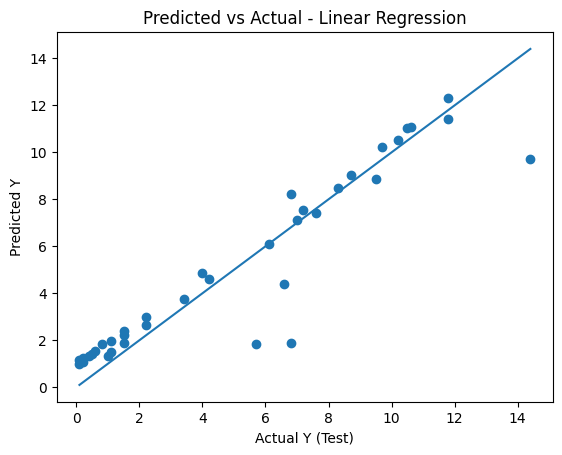

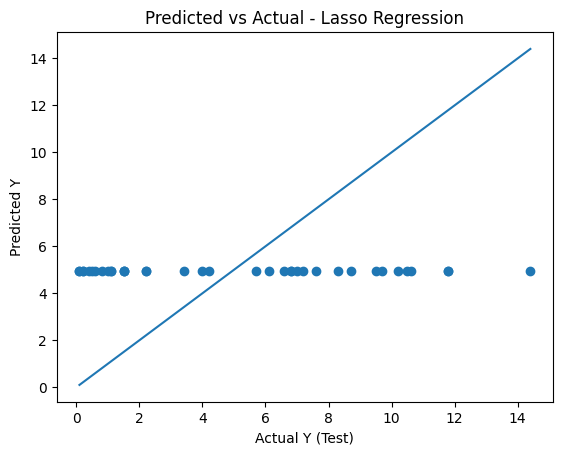

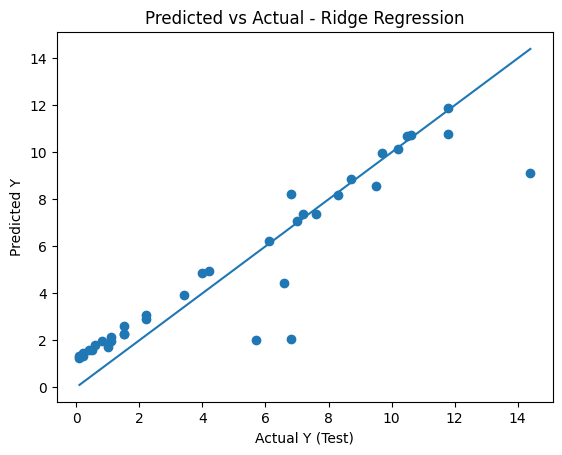

In [37]:
import matplotlib.pyplot as plt
def plot_predicted_vs_actual(y_test, y_pred, model_name):
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Y (Test)")
    plt.ylabel("Predicted Y")
    plt.title(f"Predicted vs Actual - {model_name}")

    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val])

    plt.show()
for name, model in models.items():
    y_test_pred = model.predict(X_test_scaled)
    plot_predicted_vs_actual(y_test, y_test_pred, name)
